In [1]:
from graph import *
%matplotlib inline

-> ajouter poids ou non dans graphe ?

-> todo label tridimensionel

-> calculer matrice labels

In [2]:
%%time
db, path = gen_export_db(50,20,10,5,0.05)

CPU times: user 590 ms, sys: 12.1 ms, total: 602 ms
Wall time: 601 ms


In [3]:
path

'dbs/db-1549567704.5421793.dat'

In [4]:
db.shape

(1050, 2)

In [5]:
db[:,1]

array(['star', 'chain', 'tree', ..., 'grid', 'chain', 'star'],
      dtype=object)

In [6]:
np.unique(db[:,1],return_counts=True)

(array(['chain', 'cube', 'grid', 'ring', 'star', 'tree'], dtype=object),
 array([168, 168, 231, 168, 147, 168]))

In [7]:
from kernels import *

0.6666666666666667
CPU times: user 5min 28s, sys: 6min 9s, total: 11min 37s
Wall time: 4min 7s


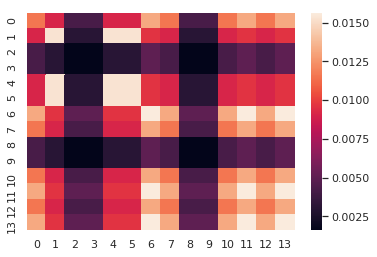

In [11]:
%%time
db2, path = gen_export_db(4,4,10,5,0.1,True)
test(db2)
# somme de k = Wx.shape ou 10xWx.shape ne change rien
#normalisé bcp plus rapide
# certains ont un meilleur score avec d'autres que eux mêmes 

In [9]:
from time import time
X = []
Y = []aa
#on varie nb altered
for i in range(1,4):
    X.append(i*3)
    db2, path = gen_export_db(3,i,10,5,0.05)
    t = time()
    test(db2)
    diff = time()-t
    Y.append(diff)
import matplotlib.pyplot as plt
plt.plot(X,Y)
plt.title("Complexité du calcul du noyau + apprentissage SVM en fonction du nombre de graphes de 8<=N<=10")

SyntaxError: invalid syntax (<ipython-input-9-b615c2e80e1f>, line 3)

In [ ]:
import seaborn as sns

In [ ]:
v = np.random.random((5))
v2 = np.random.random((5))
v3 = np.random.random((5))
v4 = np.random.random((5))
#v /= np.linalg.norm(v)
#v2 /= np.linalg.norm(v2)
#v3 /= np.linalg.norm(v3)
#v4 /= np.linalg.norm(v4)
db = [v,v2,v3,v4]
gram = np.empty((len(db),len(db)))
for i in range(len(db)):
    for j in range(i+1):
        ker = np.dot(db[i],db[j])
        gram[i, j] = ker
        if i != j:
            gram[j, i] = ker
sns.heatmap(gram)